# Figures in the Analyses of This Paper

In [2]:
import os
import sys
sys.path.insert(0, './')

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 12})
import matplotlib.pyplot as plt

import json
import numpy as np

# Global Constants
root_path = './results'
analysis_path = root_path + '/analysis'
casestudy_path = root_path + '/case_study'
finetune_path = root_path + '/finetune'

## 4. Hard Instances Lead to Overfitting

In [12]:
from util.color import get_color
from visualize.plot_learncurve import plot
from visualize.plot_activation import plot as plot_activation

### Figure 2: Training on a Subset

To render figure 2, we need 9 json files. We provide one example to generate `200epoch_pgd_easy10k.json`. Before training based on the easiest 10000 examples, we first need to generate the difficulty function in this context, which is stored as the file `200epoch_pgd_sortby_loss.json`.

```
# Generate 200epoch_pgd_sortby_loss.json

python run/train_normal.py --valid_ratio 0.02 --epoch_num 200 --out_folder results/cifar10_resnet --model_name 200_pgd_full --optim name=sgd,lr=1e-1,momentum=0.9,weight_decay=5e-4 --lr_schedule name=jump,min_jump_pt=100,jump_freq=50,start_v=0.1,power=0.1 --attack name=pgd,step_size=2,threshold=8,iter_num=10,order=-1 --gpu 0

python analyze/sort_instance.py --valid_ratio 0.02 --min_epoch 10 --json_file results/cifar10_resnet/200_pgd_full.json --metric loss --out_file results/cifar10_resnet/200epoch_pgd_sortby_loss.json

# Generate 200epoch_pgd_easy10k.json

python run/train_normal.py --valid_ratio 0.02 --per_file results/cifar10_resnet/200epoch_pgd_sortby_loss.json --subset num=10000,mode=easy --epoch_num 200 --out_folder results/cifar10_resnet --model_name 200epoch_pgd_easy10k --optim name=sgd,lr=1e-1,momentum=0.9,weight_decay=5e-4 --lr_schedule name=jump,min_jump_pt=100,jump_freq=50,start_v=0.1,power=0.1 --attack name=pgd,step_size=2,threshold=8,iter_num=10,order=-1 --gpu 0
```

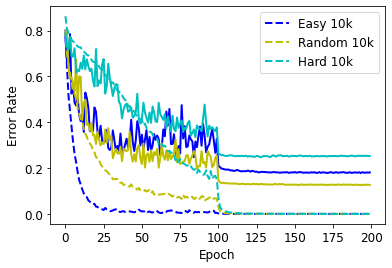

In [10]:
# On CIFAR10
## PGD 
plt.clf()
plot(json_files = [analysis_path + '/cifar10_resnet/200epoch_pgd_easy10k.json',
                      analysis_path + '/cifar10_resnet/200epoch_pgd_random10k.json',
                      analysis_path + '/cifar10_resnet/200epoch_pgd_hard10k.json'],
    labels = [None, None, None], subsets = '02', x_range = None)
plt.savefig(analysis_path + '/cifar10_resnet/200epoch_pgd_10kcompare.pdf', dpi = 500, bbox_inches = 'tight')
## FGSM
plt.clf()
plot(json_files = [analysis_path + '/cifar10_resnet/200epoch_fgsm_easy10k.json',
                      analysis_path + '/cifar10_resnet/200epoch_fgsm_random10k.json',
                      analysis_path + '/cifar10_resnet/200epoch_fgsm_hard10k.json'],
    labels = [None, None, None], subsets = '02', x_range = None)
plt.savefig(analysis_path + '/cifar10_resnet/200epoch_fgsm_10kcompare.pdf', dpi = 500, bbox_inches = 'tight')
## Clean
plt.clf()
plot(json_files = [analysis_path + '/cifar10_resnet/200epoch_clean_easy10k.json',
                  analysis_path + '/cifar10_resnet/200epoch_clean_random10k.json',
                  analysis_path + '/cifar10_resnet/200epoch_clean_hard10k.json'],
    labels = ['Easy 10k', 'Random 10k', 'Hard 10k'], subsets = '02', x_range = None)
plt.savefig(analysis_path + '/cifar10_resnet/200epoch_clean_10kcompare.pdf', dpi = 500, bbox_inches = 'tight')

### Figure 3: Different Duration, Different Optimizers, Different Data Volumes

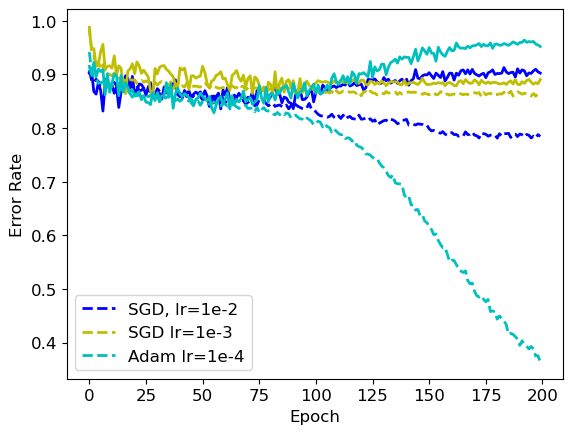

In [6]:
# Figure 3b
plt.clf()
plot(json_files = [analysis_path + '/cifar10_resnet/200epoch_pgd_hard10k_lr1e-2.json',
                      analysis_path + '/cifar10_resnet/200epoch_pgd_hard10k_lr1e-3.json',
                      analysis_path + '/cifar10_resnet/200epoch_pgd_hard10k_adam1e-4.json'],
    labels = ['SGD, lr=1e-2', 'SGD lr=1e-3', 'Adam lr=1e-4'], subsets = '02', x_range = None)
plt.savefig(analysis_path + '/cifar10_resnet/200epoch_pgd_hard10k_optimcompare.pdf', dpi = 500, bbox_inches = 'tight')

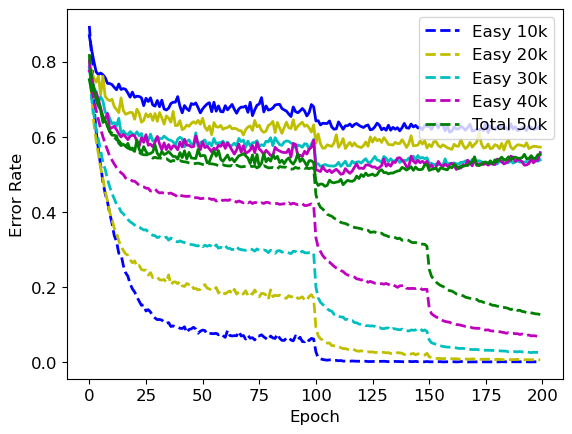

In [8]:
# Figure 3c
plt.clf()
plot(json_files = [analysis_path + '/cifar10_resnet/200epoch_pgd_easy10k.json',
                      analysis_path + '/cifar10_resnet/200epoch_pgd_easy20k.json',
                      analysis_path + '/cifar10_resnet/200epoch_pgd_easy30k.json',
                      analysis_path + '/cifar10_resnet/200epoch_pgd_easy40k.json',
                      analysis_path + '/cifar10_resnet/200epoch_pgd_full.json'],
    labels = ['Easy 10k', 'Easy 20k', 'Easy 30k', 'Easy 40k', 'Total 50k'], subsets = '02', x_range = None)
plt.savefig(analysis_path + '/cifar10_resnet/200epoch_pgd_numcompare.pdf', dpi = 500, bbox_inches = 'tight')

### Figure 4: Training Dynamics for Different Difficulty Levels

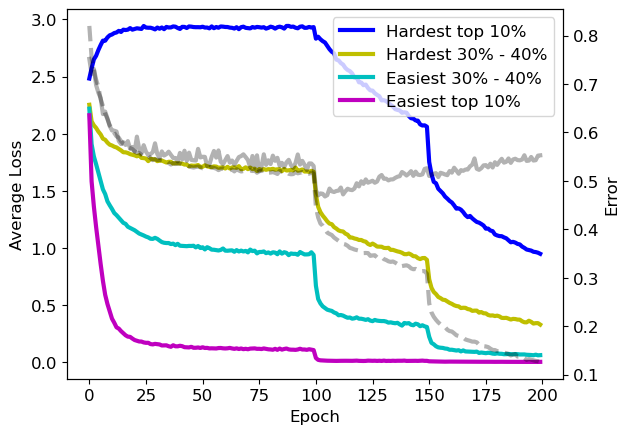

In [11]:
# Figure 4a

# Data 
data_info = json.load(open(analysis_path + '/cifar10_resnet/200epoch_pgd_full.json', 'r'))
per_info = json.load(open(analysis_path + '/cifar10_resnet/200epoch_pgd_sortby_loss.json', 'r'))

# Construct idx2group
per_info['train_per_report'].keys()
per_list = []
for label in per_info['train_per_report']:
    per_list = per_list + per_info['train_per_report'][label]
idx2group = {}
for per_info_term in per_list:
    group_this_instance = max(min(int(per_info_term['per'][0] * 10), 9), 0)
    idx = per_info_term['idx']
    idx2group[int(idx)] = group_this_instance

# Construct results
epoch_list = list(sorted(map(int, data_info['train_loss_per_instance'].keys())))
instance_num_by_group = [0 for _ in range(10)]
instance_loss_by_group = [[0. for _ in range(10)] for _ in epoch_list]
for idx, epoch_idx in enumerate(epoch_list):
    for instance_idx in data_info['train_loss_per_instance'][str(epoch_idx)]:
        group_this_instance = idx2group[int(instance_idx)]
        if idx == 0:
            instance_num_by_group[group_this_instance] += 1
        instance_loss_by_group[idx][group_this_instance] += data_info['train_loss_per_instance'][str(epoch_idx)][instance_idx]
instance_loss_by_group = [np.array(item) / np.array(instance_num_by_group) for item in instance_loss_by_group]
results = [[item[group_idx] for item in instance_loss_by_group] for group_idx in range(10)]

# Loss for group 0, 3, 6, 9
hard0 = [item[0] for item in instance_loss_by_group]
hard3 = [item[3] for item in instance_loss_by_group]
easy3 = [item[6] for item in instance_loss_by_group]
easy0 = [item[9] for item in instance_loss_by_group]

# Training and test error
train_err = [1. - data_info['train_acc'][str(epoch_idx)] for epoch_idx in epoch_list]
test_err = [1. - data_info['test_acc'][str(epoch_idx)] for epoch_idx in epoch_list]

# Plot
fig, ax1 = plt.subplots()

ax1.plot(epoch_list, hard0, color = get_color(0), linewidth = 3, label = 'Hardest top 10%')
ax1.plot(epoch_list, hard3, color = get_color(1), linewidth = 3, label = 'Hardest 30% - 40%')
ax1.plot(epoch_list, easy3, color = get_color(2), linewidth = 3, label = 'Easiest 30% - 40%')
ax1.plot(epoch_list, easy0, color = get_color(3), linewidth = 3, label = 'Easiest top 10%')

ax2 = ax1.twinx()

ax2.plot(epoch_list, train_err, linestyle = '--', color = 'k', alpha = 0.3, linewidth = 3)
ax2.plot(epoch_list, test_err, linestyle = '-', color = 'k', alpha = 0.3, linewidth = 3)

ax1.legend(prop = {'size': 12})
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Average Loss')
ax2.set_ylabel('Error')

plt.savefig(analysis_path + '/cifar10_resnet/200epoch_pgd_loss_by_group.pdf', dpi = 500, bbox_inches = 'tight')

We can obtain the feature magnitude during training by specifying the number of feature groups in adversarial training, specifically, necessary information to render Figure 4b can be obtained by

```
python run/train_normal.py --valid_ratio 0.02 --epoch_num 200 --out_folder results/cifar10_resnet --model_name 200_pgd_featuretractor --optim name=sgd,lr=1e-1,momentum=0.9,weight_decay=5e-4 --lr_schedule name=jump,min_jump_pt=100,jump_freq=50,start_v=0.1,power=0.1 --attack name=pgd,step_size=2,threshold=8,iter_num=10,order=-1 --feature_groups 10 --gpu 0 --per_file results/cifar10_resnet/200epoch_pgd_sortby_loss.json
```

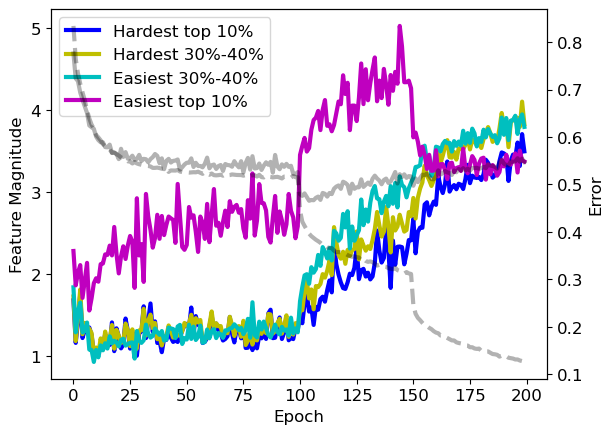

In [13]:
# Figure 4b
plot_activation(json_file = analysis_path + '/cifar10_resnet/200epoch_pgd_featuretractor.json', subset = 'train', group_list = [0, 3, 6, 9],
               label_list = ['Hardest top 10%', 'Hardest 30%-40%', 'Easiest 30%-40%', 'Easiest top 10%'], metric = 'median', norm = 2)
plt.savefig(analysis_path + '/cifar10_resnet/200epoch_pgd_featuretractor_train.pdf', dpi = 500, bbox_inches = 'tight')

## 5. Numerical Simulation of Theoretical Analysis

### Figure 5: The Trend of Lipschitz Constants

We save the checkpoints of some intermediate models and then estimate the Lipschitz constant of the these models, the command to calculate Lipschitz constant is as follows

```
# To calculate the Lipschitz constant for the models after training 10 epochs

python analyze/calc_global_lip.py --iter_num 100 --gpu 0 --model2load results/cifar10_resnet/200epoch_pgd_easy10k_10.ckpt --out_file analysis/cifar10_lipschitz/linf/eps8_easy10k_10.json
```

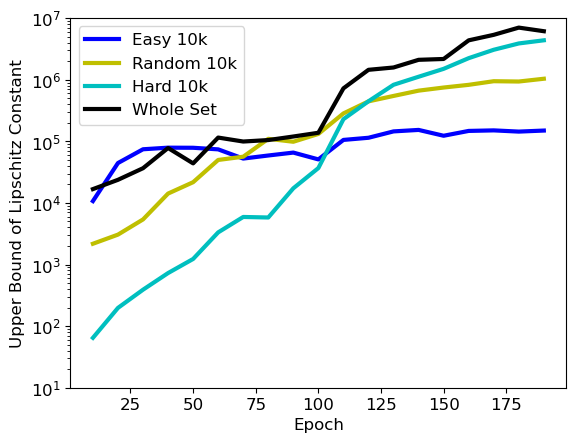

In [16]:
# Figure 5
def obtain_lips_from_file(file_prefix, epoch_idx):
    file_name = file_prefix + '_' + str(epoch_idx) + '.json'
    data = json.load(open(file_name, 'r'))
    return data['lip'][0]

epoch_list = [10 * idx for idx in range(1, 20)]
easy_lip_list = [obtain_lips_from_file(analysis_path + '/cifar10_lipschitz/linf/eps8_easy10k', epoch_idx) for epoch_idx in epoch_list]
random_lip_list = [obtain_lips_from_file(analysis_path + '/cifar10_lipschitz/linf/eps8_random10k', epoch_idx) for epoch_idx in epoch_list]
hard_lip_list = [obtain_lips_from_file(analysis_path + '/cifar10_lipschitz/linf/eps8_hard10k', epoch_idx) for epoch_idx in epoch_list]
whole_lip_list = [obtain_lips_from_file(analysis_path + '/cifar10_lipschitz/linf/eps8', epoch_idx) for epoch_idx in epoch_list]


plt.xlabel('Epoch')
plt.ylabel('Upper Bound of Lipschitz Constant')
plt.yscale('log')
plt.ylim(10, 1e7)

plt.plot(epoch_list, easy_lip_list, color = get_color(0), linewidth = 3, label = 'Easy 10k')
plt.plot(epoch_list, random_lip_list, color = get_color(1), linewidth = 3, label = 'Random 10k')
plt.plot(epoch_list, hard_lip_list, color = get_color(2), linewidth = 3, label = 'Hard 10k')
plt.plot(epoch_list, whole_lip_list, color = 'k', linewidth = 3, label = 'Whole Set')

plt.legend(prop = {'size': 12})
plt.savefig(analysis_path + '/cifar10_lipschitz/linf/eps8_trend.pdf', dpi = 500, bbox_inches = 'tight')
